In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_color_histogram(image):
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    
    hist_r = np.zeros(256)
    hist_g = np.zeros(256)
    hist_b = np.zeros(256)

    for y in range(height):
        for x in range(width):
            pixel = image[y, x]
            hist_b[pixel[0]] += 1
            hist_r[pixel[1]] += 1
            hist_g[pixel[2]] += 1

    return hist_r, hist_g, hist_b

def process_video(video_path):
    vid = cv2.VideoCapture(video_path)
    if not vid.isOpened():
        print("Error: Could not open the video.")
        return

    histograms = [] 
    frames = []

    while vid.isOpened():
        ret, frame = vid.read()
        if not ret:
            break

        hist_r, hist_g, hist_b = calculate_color_histogram(frame)
        frames.append(frame)
        histograms.append((hist_r, hist_g, hist_b)) 

    vid.release()

    return histograms, frames


video_path = '../Dataset/DatasetB.avi'
histograms, frames = process_video(video_path)


def visualize_histograms(hist_r, hist_g, hist_b):
    plt.figure(figsize=(8, 5))

    plt.plot(hist_r, color='red', label='Red Channel')
    plt.plot(hist_g, color='green', label='Green Channel')
    plt.plot(hist_b, color='blue', label='Blue Channel') 
    
    plt.title('RGB Channel Histograms')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()


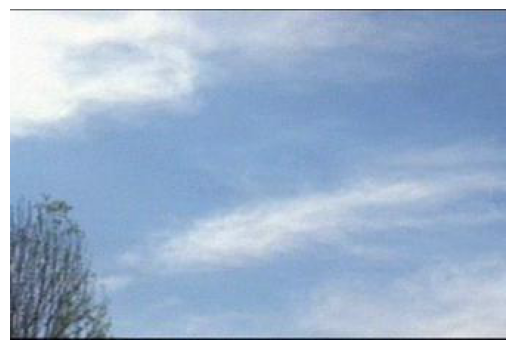

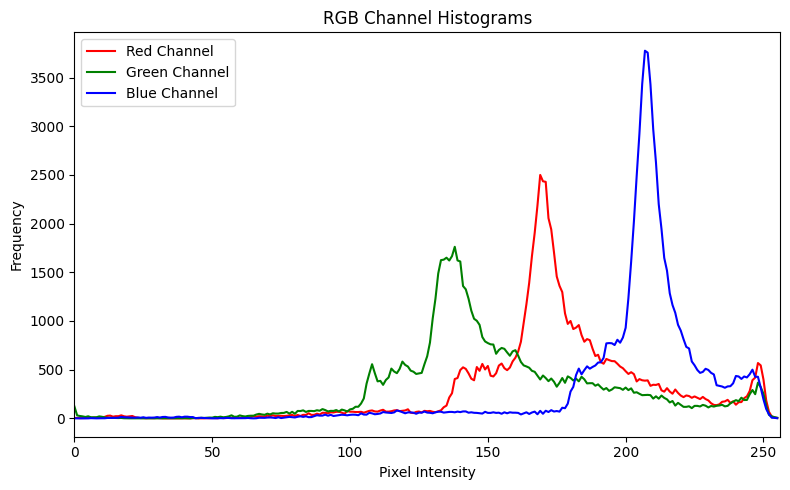

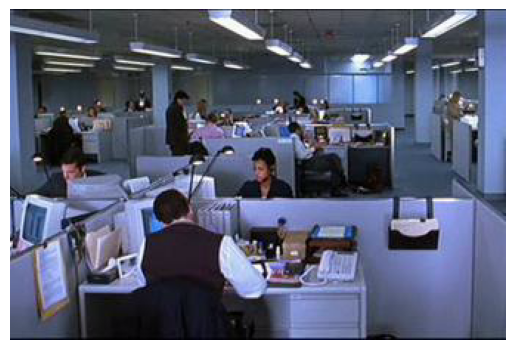

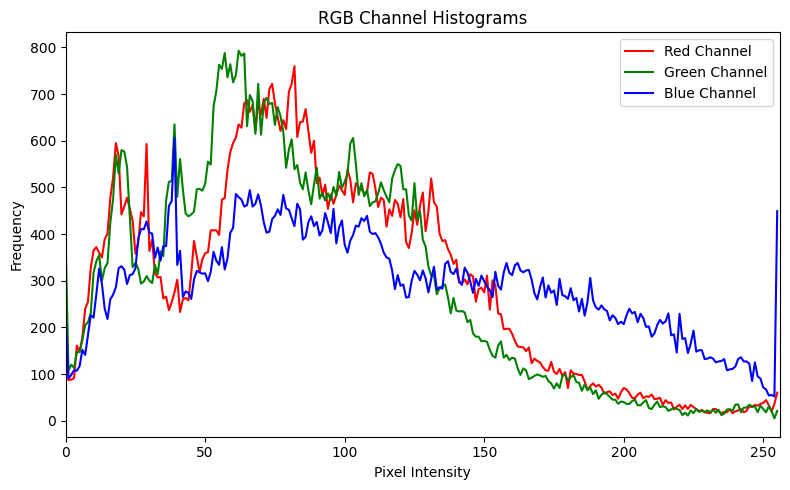

In [3]:
# Result from different Frame

frame_1 = cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame_1)
hist_r, hist_g, hist_b = histograms[0]
visualize_histograms(hist_r, hist_g, hist_b)
plt.show()

frame_100 = cv2.cvtColor(frames[100], cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame_100)
hist_r, hist_g, hist_b = histograms[100]
visualize_histograms(hist_r, hist_g, hist_b)
plt.show()

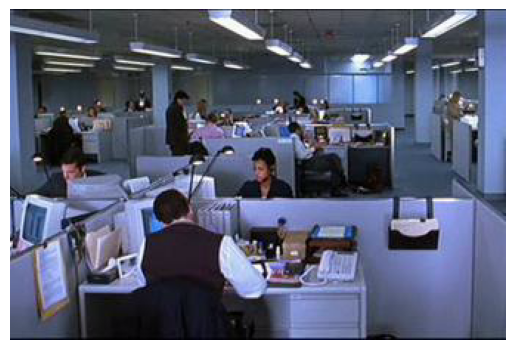

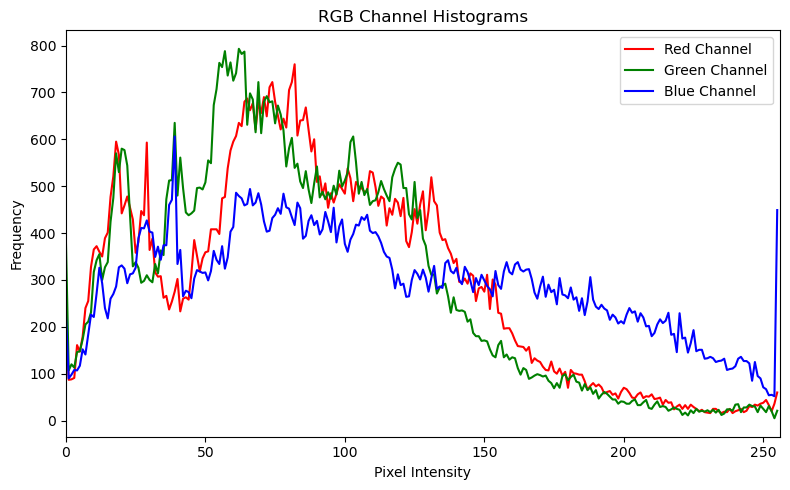

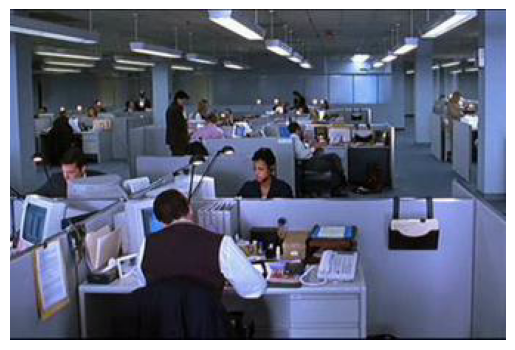

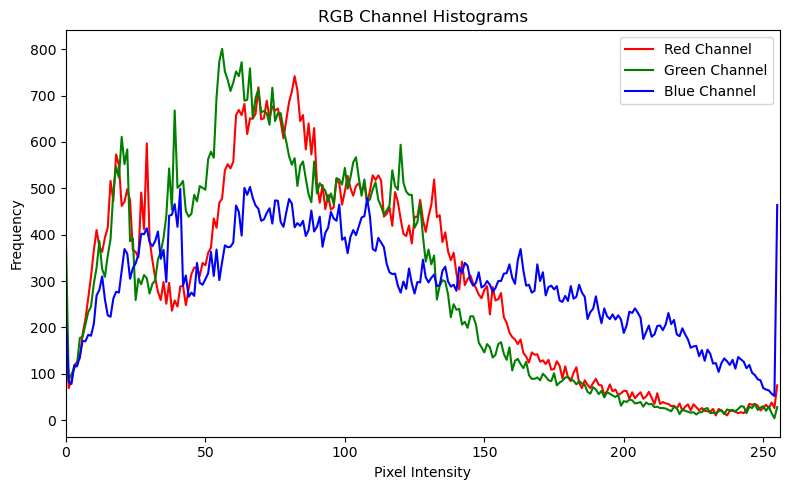

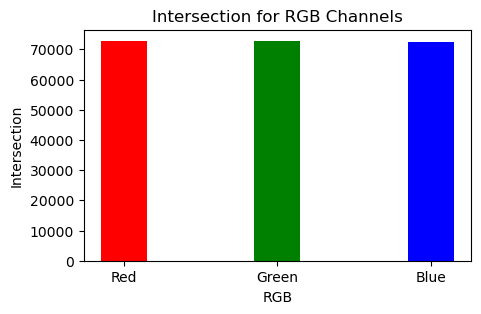

In [64]:
def calculate_intersection(hist1, hist2):
    # Calculate histogram intersection
    intersection = np.sum(np.minimum(hist1, hist2))
    return intersection

intersectionsR = calculate_intersection(histograms[100][0], histograms[101][0])
intersectionsG = calculate_intersection(histograms[100][1], histograms[101][1])
intersectionsB = calculate_intersection(histograms[100][2], histograms[101][2])

# Result from consecutive Frame
frame_1 = cv2.cvtColor(frames[100], cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame_1)
hist_r, hist_g, hist_b = histograms[100]
visualize_histograms(hist_r, hist_g, hist_b)
plt.show()

frame_100 = cv2.cvtColor(frames[101], cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame_100)
hist_r, hist_g, hist_b = histograms[101]
visualize_histograms(hist_r, hist_g, hist_b)
plt.show()



plt.figure(figsize=(5, 3))

bar_width = 0.3

plt.bar("Red", intersectionsR, bar_width, color="red")
plt.bar("Green", intersectionsG, bar_width, color="green")
plt.bar("Blue", intersectionsB, bar_width, color="blue")
plt.xlabel('RGB')
plt.ylabel('Intersection')
plt.title('Intersection for RGB Channels')


plt.show()


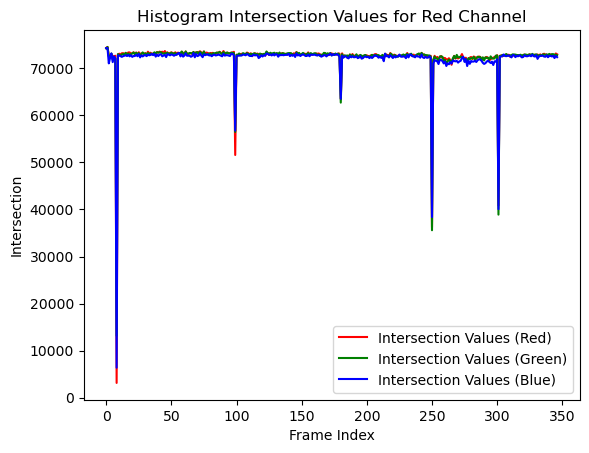

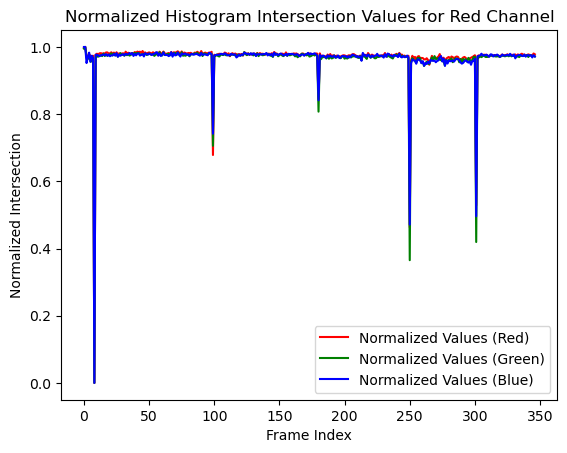

In [65]:
intersections = []
for i in range(len(histograms) - 1):
    hist_current = histograms[i]
    hist_next = histograms[i + 1]
    intersection = calculate_intersection(hist_current, hist_next)
    intersections.append(intersection)

# Calculating intersections for each channel
intersections_r = []
intersections_g = []
intersections_b = []

# Calculate intersections for each channel
for i in range(len(histograms) - 1):
    intersection_r = calculate_intersection(histograms[i][0], histograms[i + 1][0])
    intersections_r.append(intersection_r)
    intersection_g = calculate_intersection(histograms[i][1], histograms[i + 1][1])
    intersections_g.append(intersection_g)
    intersection_b = calculate_intersection(histograms[i][2], histograms[i + 1][2])
    intersections_b.append(intersection_b)

# Normalize the intersection values for each channel
normalized_intersections_r = (intersections_r - np.min(intersections_r)) / (np.max(intersections_r) - np.min(intersections_r))
normalized_intersections_g = (intersections_g - np.min(intersections_g)) / (np.max(intersections_g) - np.min(intersections_g))
normalized_intersections_b = (intersections_b - np.min(intersections_b)) / (np.max(intersections_b) - np.min(intersections_b))

# Plotting intersections for each channel

plt.plot(intersections_r, label='Intersection Values (Red)', color='red')
plt.plot(intersections_g, label='Intersection Values (Green)', color='green')
plt.plot(intersections_b, label='Intersection Values (Blue)', color='blue')
plt.xlabel('Frame Index')
plt.ylabel('Intersection')
plt.title('Histogram Intersection Values for Red Channel')
plt.legend()

plt.show()

# Plotting normalized intersections for each channel
plt.plot(normalized_intersections_r, label='Normalized Values (Red)', color='red')
plt.plot(normalized_intersections_g, label='Normalized Values (Green)', color='green')
plt.plot(normalized_intersections_b, label='Normalized Values (Blue)', color='blue')
plt.xlabel('Frame Index')
plt.ylabel('Normalized Intersection')
plt.title('Normalized Histogram Intersection Values for Red Channel')
plt.legend()

plt.show()
